# Modelo red neuronal

In [1]:
from importacion_preprocesado import download_and_load_data, preprocesamiento


tamany_img = (128,128) # tamaño reducido para colab porque si no supera la ram
X, y = download_and_load_data(target_size=tamany_img)

X_train, X_val, X_test, y_train, y_val, y_test = preprocesamiento(X, y)

Dataset ya existe, solo se van a cargar las imágenes.
X shape: (4217, 128, 128, 3) y shape: (4217,)


In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Pasamos los datos a flatten
X_train_f = X_train.reshape(X_train.shape[0], -1)
X_val_f   = X_val.reshape(X_val.shape[0], -1)
X_test_f  = X_test.reshape(X_test.shape[0], -1)

y_train_f = np.argmax(y_train, axis=1)
y_val_f = np.argmax(y_val, axis=1)
y_test_f = np.argmax(y_test, axis=1)

In [12]:
# Modelo
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
rf.fit(X_train_f, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
n_params = sum(tree.tree_.node_count for tree in rf.estimators_)
print("Numero de parametros:", n_params)

Numero de parametros: 47844


In [ ]:

def evaluate(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="weighted")
    return acc, f1

acc_train, f1_train = evaluate(rf, X_train_f, y_train)
acc_val, f1_val = evaluate(rf, X_val_f, y_val)
acc_test, f1_test = evaluate(rf, X_test_f, y_test)


Train F1: 1.0, Val F1: 0.7750800774519804, Test F1: 0.7522339941666857


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

datasets = {
    "Train": (X_train, y_train),
    "Val": (X_val, y_val),
    "Test": (X_test, y_test)
}

def evaluate(model, X, y):
    #Convertir a enteros
    y_true = np.argmax(y, axis=1)

    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    return acc, f1


def crear_df_metricas(resultados = []):
    nombres = ["Train", "Val", "Test"]
    results = {}
    for nombre, (acc, f1) in zip(nombres, resultados):
        results[nombre] = [acc, f1]
    
    df = pd.DataFrame(results, index=["Accuracy", "F1"])
    return df

df = crear_df_metricas(resultados=[[acc_train, f1_train], [acc_val, f1_val], [acc_test, f1_test]])
df


,Train,Val,Test
Accuracy,1.0,0.728673,0.708531
F1,1.0,0.775080,0.752234


In [20]:
import matplotlib.pyplot as plt

def plot_barra(metrica, titulo, color):

    plt.figure(figsize=(6,4))
    bars = plt.bar(metrica.index, metrica.values, color=color)
    plt.bar_label(bars)
    plt.title(f"{titulo}: Train vs Validation vs Test")
    plt.ylabel(titulo)
    plt.ylim(0,1)
    plt.grid(axis='y', linestyle='--')
    plt.show()


def plots_metricas(df):
    #Extraemos la fila
    accuracy = df.loc["Accuracy"]
    f1 = df.loc["F1"]

    #Grafico de Accuracy
    plot_barra(accuracy, titulo = "Accuracy", color="blue")

    #Grafico de 
    plot_barra(f1, titulo ="F1", color = "red")

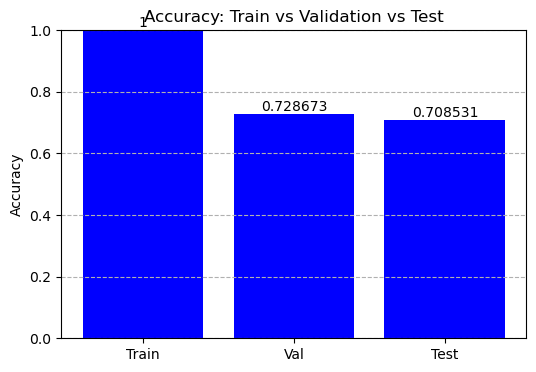

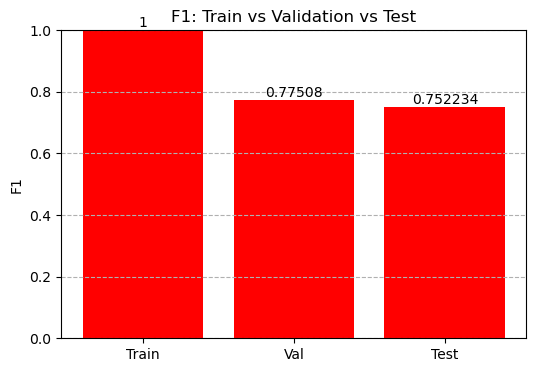

In [21]:
plots_metricas(df)

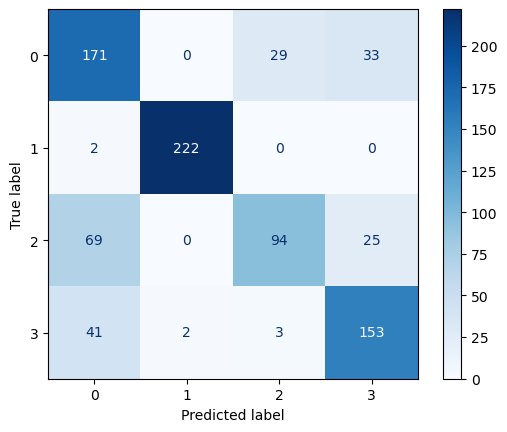

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(rf.predict(X_test_f), axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")